<a href="https://colab.research.google.com/github/SERVIR/Explore_GEDI_EarthRISE_Training/blob/main/Sewanee_Lidar_ALS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
    from google.colab import drive
    drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install laspy open3d


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.1/86.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.5 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [9]:
import laspy
import numpy as np

las_paths = [
    "/content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Sewanee_Lidar_2018/1982317SE.las",
    "/content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Sewanee_Lidar_2018/1982309NE.las"
]

points = []
intensity = []

for path in las_paths:
    las = laspy.read(path)
    pts = np.vstack((las.x, las.y, las.z)).T
    points.append(pts)
    intensity.append(las.intensity)

points = np.vstack(points)
intensity = np.hstack(intensity)

print("Points loaded:", points.shape)
print("Intensity range:", intensity.min(), "-", intensity.max())


Points loaded: (36085813, 3)
Intensity range: 0 - 65535


In [13]:
import laspy

las_path = "/content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Sewanee_Lidar_2018/1982317SE.las"

las = laspy.read(las_path)

print("Available dimensions in this LAS file:")
print(las.point_format.dimension_names)


Available dimensions in this LAS file:
<generator object PointFormat.dimension_names.<locals>.<genexpr> at 0x791ee260b040>


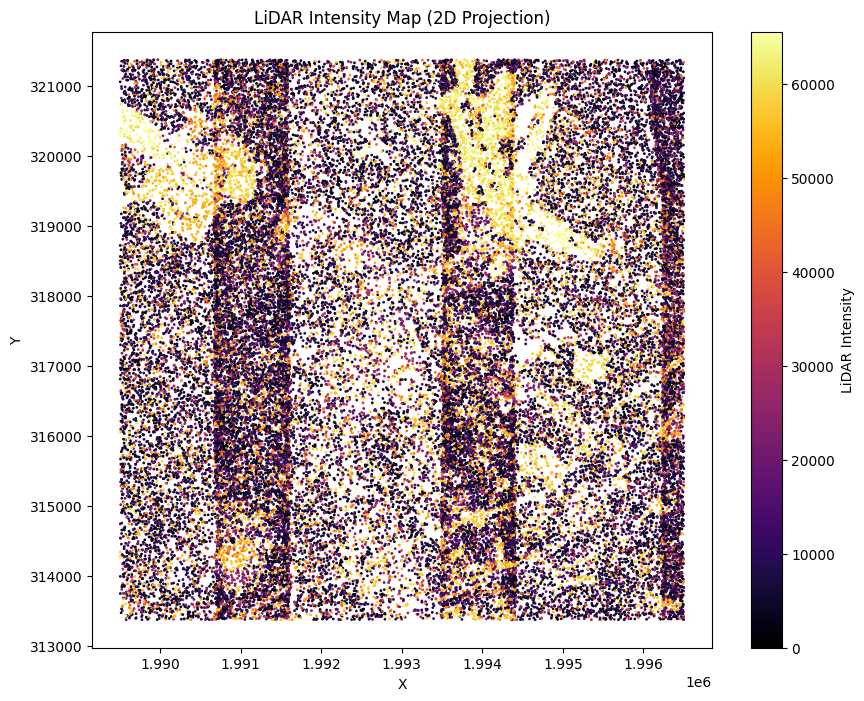

In [10]:
import matplotlib.pyplot as plt

# Downsample for speed
sample_idx = np.random.choice(points.shape[0], size=50000, replace=False)
sample_points = points[sample_idx]
sample_intensity = intensity[sample_idx]

plt.figure(figsize=(10, 8))
sc = plt.scatter(
    sample_points[:, 0], sample_points[:, 1],
    c=sample_intensity, cmap="inferno", s=1
)
plt.colorbar(sc, label="LiDAR Intensity")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("LiDAR Intensity Map (2D Projection)")
plt.show()


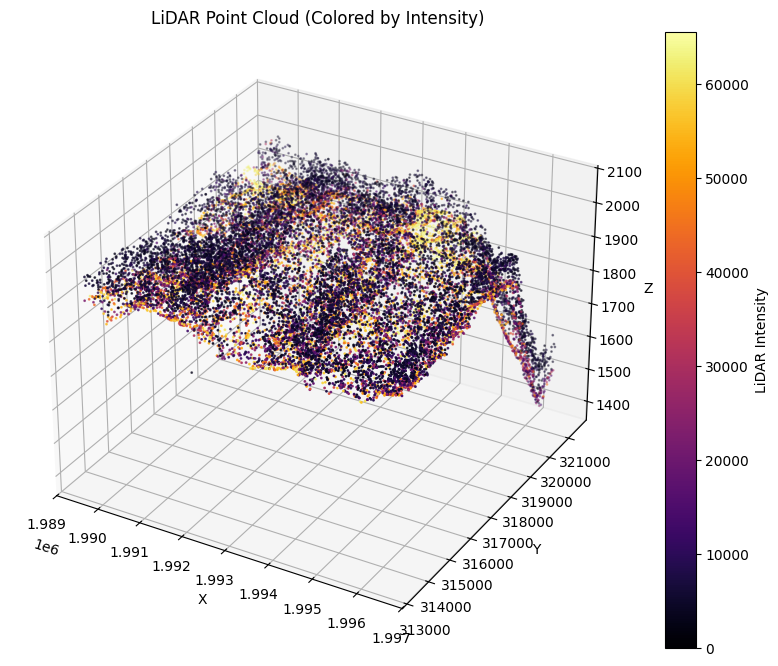

In [11]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

sample_idx = np.random.choice(points.shape[0], size=20000, replace=False)
sample_points = points[sample_idx]
sample_intensity = intensity[sample_idx]

p = ax.scatter(
    sample_points[:, 0], sample_points[:, 1], sample_points[:, 2],
    c=sample_intensity, cmap="inferno", s=1
)

fig.colorbar(p, ax=ax, label="LiDAR Intensity")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("LiDAR Point Cloud (Colored by Intensity)")
plt.show()


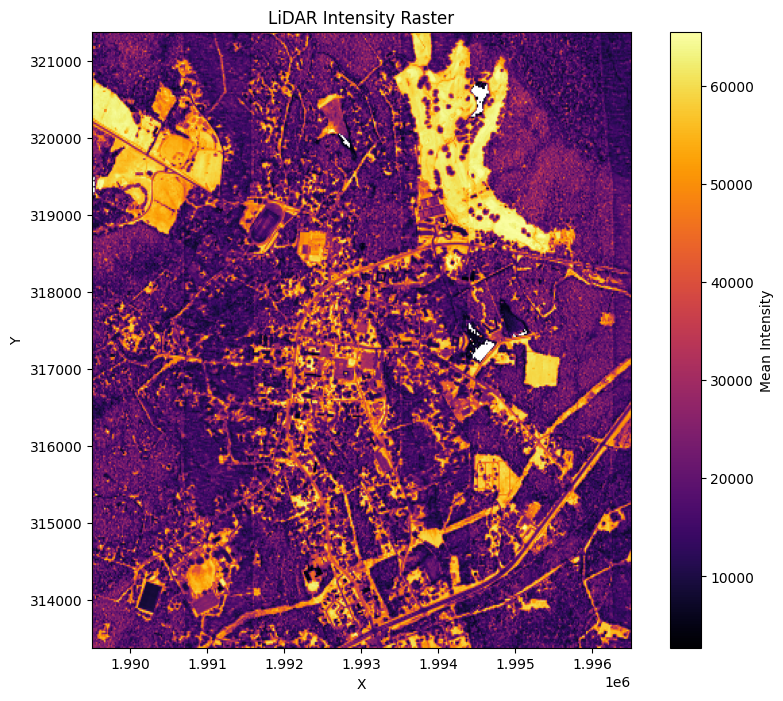

In [12]:
from scipy.stats import binned_statistic_2d

stat, x_edges, y_edges, binnumber = binned_statistic_2d(
    points[:,0], points[:,1], intensity,
    statistic="mean", bins=[400, 400]
)

plt.figure(figsize=(10, 8))
plt.imshow(stat.T, origin="lower", cmap="inferno",
           extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]])
plt.colorbar(label="Mean Intensity")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("LiDAR Intensity Raster")
plt.show()


In [14]:
!pip install plotly


In [20]:
import laspy
import numpy as np
import plotly.graph_objects as go

# ---------------------------
# Step 1: Load LAS data
# ---------------------------
las_paths = [
    "/content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Sewanee_Lidar_2018/1982317SE.las",
    "/content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Sewanee_Lidar_2018/1982309NE.las"
]

points = []
intensity = []

for path in las_paths:
    las = laspy.read(path)
    pts = np.vstack((las.x, las.y, las.z)).T
    points.append(pts)
    intensity.append(las.intensity)

points = np.vstack(points)
intensity = np.hstack(intensity)
z_values = points[:, 2]

print("Loaded points:", points.shape)
print("Intensity range:", intensity.min(), "-", intensity.max())
print("Z (elevation) range:", z_values.min(), "-", z_values.max())

# ---------------------------
# Step 2: Downsample (for plotting speed)
# ---------------------------
sample_idx = np.random.choice(points.shape[0], size=50000, replace=False)
sample_points = points[sample_idx]
sample_intensity = intensity[sample_idx]
sample_z = z_values[sample_idx]

# ---------------------------
# Step 3: Function to plot
# ---------------------------
def plot_pointcloud(points, values, title, cmap="Inferno"):
    fig = go.Figure(data=[go.Scatter3d(
        x=points[:,0],
        y=points[:,1],
        z=points[:,2],
        mode='markers',
        marker=dict(
            size=2,
            color=values,
            colorscale=cmap,
            opacity=0.7
        )
    )])

    fig.update_layout(
        scene=dict(
            xaxis_title="X",
            yaxis_title="Y",
            zaxis_title="Z"
        ),
        title=title,
        height=800
    )
    fig.show()

# ---------------------------
# Step 4: Plot by Intensity
# ---------------------------
plot_pointcloud(sample_points, sample_intensity,
                title="Interactive LiDAR Point Cloud (Colored by Intensity)",
                cmap="Inferno")

# ---------------------------
# Step 5: Plot by Elevation (Z)
# ---------------------------
plot_pointcloud(sample_points, sample_z,
                title="Interactive LiDAR Point Cloud (Colored by Elevation / Z)",
                cmap="Viridis")


Loaded points: (36085813, 3)
Intensity range: 0 - 65535
Z (elevation) range: 1372.42 - 2069.31
